In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [85]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("igala.csv", names=["igala", "english"])

In [86]:
df['english'] = df['english'].astype(str)
df['igala'] = df['igala'].astype(str)

In [87]:
# Extract the English and Igala words as separate lists
english_words = df["english"].tolist()
igala_words = df["igala"].tolist()

In [88]:
def preprocess_text(words):
    """Lowercase words, handling potential non-string values."""
    return [str(w).lower() for w in words]

english_words = preprocess_text(english_words)
igala_words = preprocess_text(igala_words)

In [89]:
# Create tokenizers for English and Igala
eng_tokenizer = Tokenizer(char_level=True)  # Character-level tokenization
eng_tokenizer.fit_on_texts(english_words)
eng_vocab_size = len(eng_tokenizer.word_index) + 1

igl_tokenizer = Tokenizer(char_level=True)  # Character-level tokenization
igl_tokenizer.fit_on_texts(igala_words)
igl_vocab_size = len(igl_tokenizer.word_index) + 1


In [90]:
# Convert words to sequences of character indices
eng_sequences = eng_tokenizer.texts_to_sequences(english_words)
igl_sequences = igl_tokenizer.texts_to_sequences(igala_words)

In [91]:
# Pad sequences to have the same length
max_length = max(len(seq) for seq in eng_sequences + igl_sequences)
eng_sequences = pad_sequences(eng_sequences, maxlen=max_length, padding='post')
igl_sequences = pad_sequences(igl_sequences, maxlen=max_length, padding='post')

In [92]:
# Prepare training data
X = eng_sequences
y = igl_sequences

In [93]:
# One-hot encode the target sequences
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=igl_vocab_size)

In [94]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Build the neural network model
model = Sequential()
model.add(Embedding(eng_vocab_size, 128, input_length=max_length))
model.add(LSTM(128, return_sequences=True))  # Return sequences for each time step
model.add(Dense(igl_vocab_size, activation='softmax'))

In [96]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Use categorical_crossentropy for one-hot encoded targets

Epoch 1/300
10/10 [==============================] - 2s 29ms/step - loss: 1.2782 - accuracy: 0.6863 - val_loss: 1.4965 - val_accuracy: 0.6687
Epoch 2/300
10/10 [==============================] - 0s 23ms/step - loss: 1.2705 - accuracy: 0.6859 - val_loss: 1.4840 - val_accuracy: 0.6695
Epoch 3/300
10/10 [==============================] - 0s 21ms/step - loss: 1.2679 - accuracy: 0.6861 - val_loss: 1.5137 - val_accuracy: 0.6695
Epoch 4/300
10/10 [==============================] - 0s 23ms/step - loss: 1.2756 - accuracy: 0.6859 - val_loss: 1.4963 - val_accuracy: 0.6703
Epoch 5/300
10/10 [==============================] - 0s 21ms/step - loss: 1.2626 - accuracy: 0.6859 - val_loss: 1.4973 - val_accuracy: 0.6687
Epoch 6/300
10/10 [==============================] - 0s 22ms/step - loss: 1.2597 - accuracy: 0.6859 - val_loss: 1.4963 - val_accuracy: 0.6695
Epoch 7/300
10/10 [==============================] - 0s 21ms/step - loss: 1.2570 - accuracy: 0.6857 - val_loss: 1.5094 - val_accuracy: 0.6695
Epoch 

10/10 [==============================] - 0s 19ms/step - loss: 1.0266 - accuracy: 0.7111 - val_loss: 1.6553 - val_accuracy: 0.6492
Epoch 59/300
10/10 [==============================] - 0s 18ms/step - loss: 1.0209 - accuracy: 0.7113 - val_loss: 1.6664 - val_accuracy: 0.6344
Epoch 60/300
10/10 [==============================] - 0s 18ms/step - loss: 1.0230 - accuracy: 0.7156 - val_loss: 1.6728 - val_accuracy: 0.6391
Epoch 61/300
10/10 [==============================] - 0s 18ms/step - loss: 1.0186 - accuracy: 0.7105 - val_loss: 1.6933 - val_accuracy: 0.6492
Epoch 62/300
10/10 [==============================] - 0s 19ms/step - loss: 1.0114 - accuracy: 0.7135 - val_loss: 1.6736 - val_accuracy: 0.6516
Epoch 63/300
10/10 [==============================] - 0s 18ms/step - loss: 1.0034 - accuracy: 0.7146 - val_loss: 1.6755 - val_accuracy: 0.6477
Epoch 64/300
10/10 [==============================] - 0s 18ms/step - loss: 0.9915 - accuracy: 0.7172 - val_loss: 1.7085 - val_accuracy: 0.6281
Epoch 65/300

10/10 [==============================] - 0s 22ms/step - loss: 0.6617 - accuracy: 0.8084 - val_loss: 2.0793 - val_accuracy: 0.6328
Epoch 116/300
10/10 [==============================] - 0s 21ms/step - loss: 0.6539 - accuracy: 0.8129 - val_loss: 2.0763 - val_accuracy: 0.6313
Epoch 117/300
10/10 [==============================] - 0s 21ms/step - loss: 0.6461 - accuracy: 0.8145 - val_loss: 2.0860 - val_accuracy: 0.6266
Epoch 118/300
10/10 [==============================] - 0s 21ms/step - loss: 0.6387 - accuracy: 0.8170 - val_loss: 2.1059 - val_accuracy: 0.6281
Epoch 119/300
10/10 [==============================] - 0s 21ms/step - loss: 0.6342 - accuracy: 0.8166 - val_loss: 2.1118 - val_accuracy: 0.6266
Epoch 120/300
10/10 [==============================] - 0s 21ms/step - loss: 0.6282 - accuracy: 0.8215 - val_loss: 2.1222 - val_accuracy: 0.6258
Epoch 121/300
10/10 [==============================] - 0s 21ms/step - loss: 0.6224 - accuracy: 0.8205 - val_loss: 2.1311 - val_accuracy: 0.6266
Epoch 

Epoch 172/300
10/10 [==============================] - 0s 20ms/step - loss: 0.3866 - accuracy: 0.8863 - val_loss: 2.5351 - val_accuracy: 0.6234
Epoch 173/300
10/10 [==============================] - 0s 22ms/step - loss: 0.3834 - accuracy: 0.8855 - val_loss: 2.5437 - val_accuracy: 0.6266
Epoch 174/300
10/10 [==============================] - 0s 20ms/step - loss: 0.3799 - accuracy: 0.8883 - val_loss: 2.5466 - val_accuracy: 0.6227
Epoch 175/300
10/10 [==============================] - 0s 21ms/step - loss: 0.3761 - accuracy: 0.8891 - val_loss: 2.5601 - val_accuracy: 0.6242
Epoch 176/300
10/10 [==============================] - 0s 21ms/step - loss: 0.3743 - accuracy: 0.8883 - val_loss: 2.5602 - val_accuracy: 0.6273
Epoch 177/300
10/10 [==============================] - 0s 22ms/step - loss: 0.3735 - accuracy: 0.8887 - val_loss: 2.5768 - val_accuracy: 0.6156
Epoch 178/300
10/10 [==============================] - 0s 22ms/step - loss: 0.3749 - accuracy: 0.8865 - val_loss: 2.5946 - val_accuracy:

Epoch 229/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2857 - accuracy: 0.8902 - val_loss: 2.8649 - val_accuracy: 0.6258
Epoch 230/300
10/10 [==============================] - 0s 20ms/step - loss: 0.2840 - accuracy: 0.8916 - val_loss: 2.8636 - val_accuracy: 0.6234
Epoch 231/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2844 - accuracy: 0.8896 - val_loss: 2.8626 - val_accuracy: 0.6250
Epoch 232/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2853 - accuracy: 0.8873 - val_loss: 2.8746 - val_accuracy: 0.6242
Epoch 233/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2834 - accuracy: 0.8904 - val_loss: 2.8696 - val_accuracy: 0.6281
Epoch 234/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2822 - accuracy: 0.8891 - val_loss: 2.8834 - val_accuracy: 0.6242
Epoch 235/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2812 - accuracy: 0.8924 - val_loss: 2.8872 - val_accuracy:

Epoch 286/300
10/10 [==============================] - 0s 22ms/step - loss: 0.2557 - accuracy: 0.8859 - val_loss: 3.0651 - val_accuracy: 0.6266
Epoch 287/300
10/10 [==============================] - 0s 22ms/step - loss: 0.2553 - accuracy: 0.8873 - val_loss: 3.0742 - val_accuracy: 0.6227
Epoch 288/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2550 - accuracy: 0.8873 - val_loss: 3.0725 - val_accuracy: 0.6266
Epoch 289/300
10/10 [==============================] - 0s 22ms/step - loss: 0.2551 - accuracy: 0.8891 - val_loss: 3.0792 - val_accuracy: 0.6234
Epoch 290/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2553 - accuracy: 0.8873 - val_loss: 3.0861 - val_accuracy: 0.6242
Epoch 291/300
10/10 [==============================] - 0s 21ms/step - loss: 0.2548 - accuracy: 0.8867 - val_loss: 3.0851 - val_accuracy: 0.6227
Epoch 292/300
10/10 [==============================] - 0s 22ms/step - loss: 0.2536 - accuracy: 0.8887 - val_loss: 3.0829 - val_accuracy:

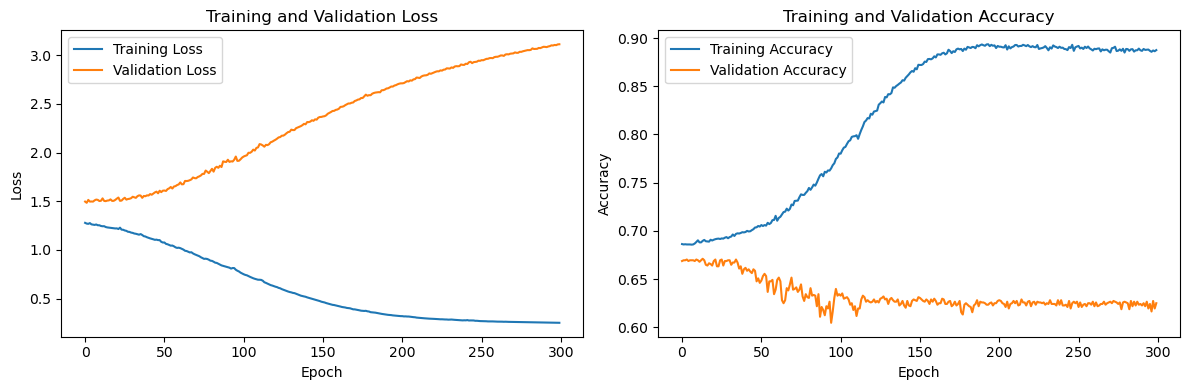

In [98]:
# Train the model
# model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))
# Train the model and store history
history = model.fit(X_train, y_train, epochs=300, batch_size=32, 
                    validation_data=(X_test, y_test))

# Plot the training and validation metrics
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [80]:
# Save the trained model
model.save("word_translator_model.keras")


In [99]:
def translate_word(word):
  """Translates an English word to Igala."""
  word = preprocess_text([word])[0] 
  sequence = eng_tokenizer.texts_to_sequences([word])
  padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
  prediction = model.predict(padded_sequence)[0]  # Get predictions for each character

  translated_word = ''
  for char_probs in prediction:
    char_index =  char_probs.argmax() # Get index of character with max probability
    for char, i in igl_tokenizer.word_index.items():
      if i == char_index:
        translated_word += char
        break
  return translated_word

In [101]:
english_word = "house"
igala_translation = translate_word(english_word)
print(f"English: {english_word}")
print(f"Igala: {igala_translation}")

1/1 [==============================] - 0s 27ms/step
English: house
Igala: òpyí
